In [2]:
%matplotlib inline

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import scipy as sp
from theano import tensor as tt
import pandas as pd

In [5]:

SEED = 5132290 # from random.org

np.random.seed(SEED)



In [101]:
N = 1
K = 5

alpha = 2.
P0 = sp.stats.norm

In [102]:
beta = sp.stats.beta.rvs(1, alpha, size=(N, K))

In [103]:
np.sum(beta)

2.2858389131329573

In [104]:
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

In [105]:
w

array([[0.16572843, 0.28497799, 0.24714673, 0.18710411, 0.08160406]])

In [106]:
w = np.empty_like(beta)
w[:, 0] = beta[:, 0]
w[:, 1:] = beta[:, 1:] * (1 - beta[:, :-1]).cumprod(axis=1)

In [112]:
w

array([[0.16572843, 0.28497799, 0.24714673, 0.18710411, 0.08160406]])

In [107]:
omega = P0.rvs(size=(N, K))

x_plot = np.linspace(-3, 3, 5)

In [108]:
omega

array([[0.17811007, 1.62991175, 0.27536926, 1.05904816, 1.55597936]])

In [109]:
x_plot

array([-3. , -1.5,  0. ,  1.5,  3. ])

In [110]:
np.less.outer(omega, x_plot)

array([[[False, False, False,  True,  True],
        [False, False, False, False,  True],
        [False, False, False,  True,  True],
        [False, False, False,  True,  True],
        [False, False, False, False,  True]]])

In [111]:
w[..., np.newaxis] * np.less.outer(omega, x_plot)

array([[[0.        , 0.        , 0.        , 0.16572843, 0.16572843],
        [0.        , 0.        , 0.        , 0.        , 0.28497799],
        [0.        , 0.        , 0.        , 0.24714673, 0.24714673],
        [0.        , 0.        , 0.        , 0.18710411, 0.18710411],
        [0.        , 0.        , 0.        , 0.        , 0.08160406]]])

In [113]:
sample_cdfs = (w[..., np.newaxis] * np.less.outer(omega, x_plot)).sum(axis=1)

In [117]:
sample_cdfs

array([[0.        , 0.        , 0.        , 0.59997928, 0.96656133]])

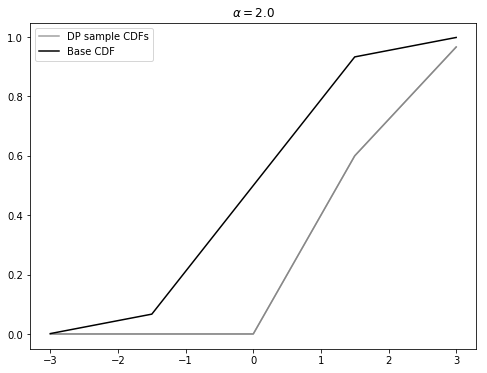

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x_plot, sample_cdfs[0], c='gray', alpha=0.75,
        label='DP sample CDFs');
ax.plot(x_plot, sample_cdfs[:].T, c='gray', alpha=0.75);
ax.plot(x_plot, P0.cdf(x_plot), c='k', label='Base CDF');

ax.set_title(r'$\alpha = {}$'.format(alpha));
ax.legend(loc=2);

In [ ]:
"""
Stick Breaking Construction
---------------------------
Generative story of Stick Breaking process
"""
import numpy as np


alpha = 1  # dirichlet prior
n_clusters = 10  # max num of clusters

G = lambda: np.random.normal()  # base distribution, theta ~ G

thetas = np.zeros(n_clusters)  # cluster params
phis = np.zeros(n_clusters)  # cluster mixing weights

prev_v = 1

for i in range(n_clusters):
    # v ~ Beta(1, alpha)
    v = np.random.beta(1, alpha)
    # theta ~ G
    theta = G()

    thetas[i] = theta
    phis[i] = v * prev_v  # v_1 * \prod_{i>1} v_i

    prev_v *= (1-v)

# Check: phis should sum to one as n_clusters -> inf
print(np.sum(phis)